# Simplicial Homology

## Simplicial Complex

### Delaunay Triangulation and Voronoi Diagram

### Vietoris-Rips Complex

In [7]:
from frameworks.tda.homology import compute_vietoris_rips_delaunay

import numpy as np
from frameworks.utils.plots import plot_vrd_complex, plot_voronoi
import matplotlib.pyplot as plt

import numpy as np
import scipy.spatial as sp
import itertools
from sklearn.neighbors import NearestNeighbors

def compute_vietoris_rips_delaunay(point_cloud, epsilon):
    """
    Compute the Vietoris-Rips complex from a Delaunay triangulation,
    filtering simplices based on pairwise distances.

    :param point_cloud: (N, D) array of N points in D-dimensional space.
    :param epsilon: float, maximum edge length to include in the complex.
    :return: List of valid simplices (edges, triangles, tetrahedra).
    """
    delaunay = sp.Delaunay(point_cloud)
    print(delaunay.simplices)
    
    # Compute pairwise Euclidean distances
    dist_matrix = sp.distance.cdist(point_cloud, point_cloud, metric="euclidean")
    
    # Step 1: Extract edges where distance ≤ epsilon
    edges = set()
    for i, j in zip(*np.where(dist_matrix <= epsilon)):  # Get all (i, j) pairs
        if i < j:  # Avoid duplicates
            edges.add((i, j))
    
    # Step 2: Filter Delaunay simplices using the edges
    simplices = list(edges)  # Start with edges (1-simplices)

    for simplex in delaunay.simplices:
        # Check all pairs in the simplex
        valid_simplex = all((i, j) in edges or (j, i) in edges for i, j in itertools.combinations(simplex, 2))
        
        if valid_simplex:
            simplices.append(simplex.tolist())

    return simplices

fig_size = 4
epsilons = [0.2]
samples = np.array([[0, 0], [2, 0], [2, 1], [0, 1]])

fig, axs = plt.subplots(1, len(epsilons) + 1, figsize=(fig_size * (len(epsilons) + 1), 1.2 * fig_size))
for i, epsilon in enumerate(epsilons):
    simplices = compute_vietoris_rips_delaunay(samples, epsilon)
    print(simplices)
    plot_vrd_complex(simplices, samples, epsilon, ax=axs[i])

plot_voronoi(samples, axs[-1])

fig.suptitle(f"Vietoris-Rips-Delaunay Complex: the VRD complex at different scales, along with the Voronoi Diagram", y=-0.05)
fig.tight_layout()

AttributeError: 'Voronoi' object has no attribute 'simplices'

<Figure size 640x480 with 0 Axes>

[[3 2 0]
 [1 3 0]]
[[3 2 0]
 [1 3 0]]
[[3 2 0]
 [1 3 0]]
[[3 2 0]
 [1 3 0]]


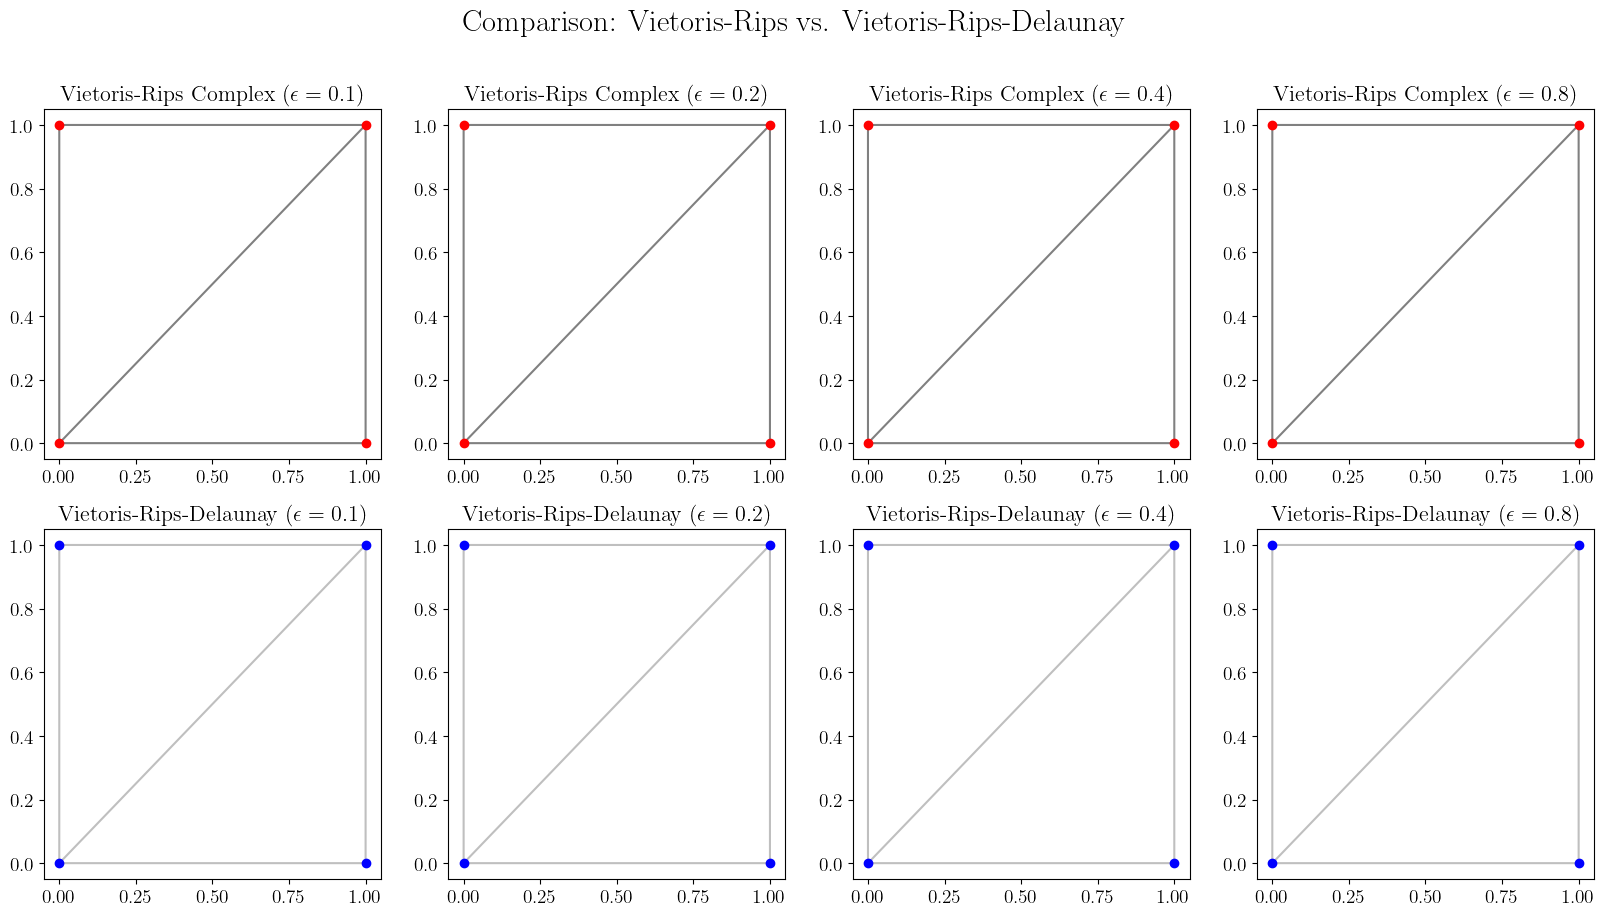

## Homology Group

# Persistent Homology

In this notebook, we will explore the concept of persistent homology, using the `giotto-tda` and `persim` libraries on a synthetic point cloud.

For an overview of the theory behind persistent homology, see [Persistent Homology](https://www.notion.so/Persistent-Homology-18405901603f802ba0a1dca69ff62192?pvs=4).

`Run ALL` to execute the code in this notebook.

## Vietoris-Rips-Delaunay Complex

We sample 100 points from an annulus of inner radius 0.4 and outer radius 0.5 in the plane:

$$
\mathcal{X} = \{x \in \mathbb{R}^2 \mid 0.4 \leq \|x\| \leq 0.5\},
$$

using `sample_annulus` function:

In [1]:
from frameworks.data.point_cloud import sample_annulus
print(sample_annulus.__doc__)

n_points = 20
samples = sample_annulus(n_points, 0.4, 0.5)

None


For each filtration value, the Vietoris-Rips-Dalaunay complex is represented by a set of simplices such that lie within epsilon.
In 2-dimensional space, the simplices are vertices, edges, and triangles.

It is computed using `compute_vietoris_rips_delaunay` function which returns a list of simplices of the complex for a given scale $\varepsilon$.

In [2]:
from frameworks.tda.homology import compute_vietoris_rips_delaunay
print(compute_vietoris_rips_delaunay.__doc__)

None


Compute the Vietoris-Rips-Delaunay complex for the sampled point cloud at scales $\varepsilon = 0.25, 0.65, 2.5,$ and $10$.
Plot the complexes along with the Voronoi diagram of the point cloud.

0.0
0.1298184935853021
0.0
0.051755150786874336
0.0
0.6157847039770374
0.0
0.17465936997141965
0.0
0.291358604127216
0.0
0.11122354836550594
0.0
0.188133030738542
0.0
0.08854943026341429
0.0
0.03584718878395391
0.0
0.03584718878395391
0.0
0.11278433688484021
0.0
0.217232481600309
0.0
0.07810981396509359
0.0
0.5679169931055731
0.0
0.15575880340296117
0.0
0.05339001978495896
0.0
0.1840955968395015
0.0
0.1443929382285477
0.0
0.07650016543026784
0.0
0.2406993454301646
0.0
0.2406993454301646
0.0
0.15848943978695537
0.0
0.03066341854561018
0.0
0.03066341854561018
0.0
0.04637579869195511
0.0
0.10955788714031817
0.0
0.08382662342819396
0.0
0.030866927314899893
0.0
0.0772868870876746
0.0
0.0772868870876746
0.0
0.2552069860456597
0.0
0.2552069860456597
0.0
0.02267464621913928
0.0
0.07480336107282336
0.0
0.15587594454234002
0.0
0.15587594454234002
0.0
0.15052203662235192
0.0
0.13191995780349783
0.0
0.13191995780349783
0.0
0.21568540986758175
0.0
0.21568540986758175
0.0
0.04785717085842459
0.0
0.1

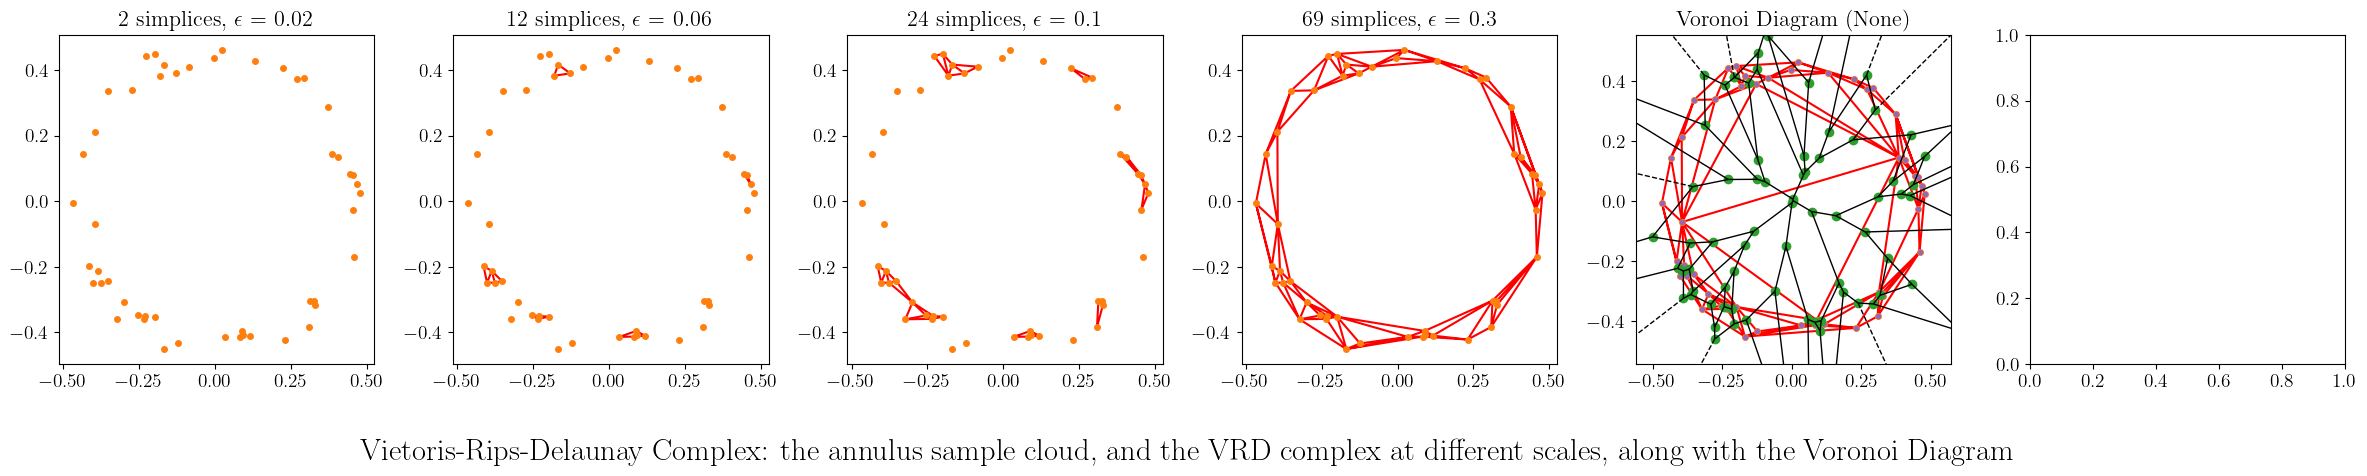

In [3]:
import matplotlib.pyplot as plt

from frameworks.utils.plots import plot_vrd_complex, plot_voronoi

fig_size = 4
epsilons = [0.02, 0.06, 0.1, 0.3, 0.9]

fig, axs = plt.subplots(1, len(epsilons) + 1, figsize=(fig_size * (len(epsilons) + 1), 1.2 * fig_size))
for i, epsilon in enumerate(epsilons):
    simplices = compute_vietoris_rips_delaunay(samples, epsilon)
    plot_vrd_complex(simplices, samples, epsilon, ax=axs[i])

plot_voronoi(samples, axs[-1])

fig.suptitle(f"Vietoris-Rips-Delaunay Complex: the annulus sample cloud, and the VRD complex at different scales, along with the Voronoi Diagram", y=-0.05)
fig.tight_layout()

# todo: do same as time-series, comparison of several shapes in 2d and 3d, boll, sphere, torus, klein bottle

Voronoi diagram is a partitioning of a plane into regions based on distance to a specific set of points.

## Topological Signatures *

Compute the Vietoris-Rips persistence at homology dimensions $0$, $1$ and $2$.
Plot persistence diagrams, barcodes, silhouettes, and Betti curves.

The barcode is a simple way to visualize the persistent homology of a filtration.
The barcode is a collection of intervals, one for each homology class, that represent the birth and death of topological features.

The Bettie curve is a plot of the number of topological features of a given dimension as a function of the filtration scale.

The silhouette is a plot of the silhouette value of a given homology class as a function of the filtration scale.

The persistence diagram is a scatter plot of the birth and death of topological features.

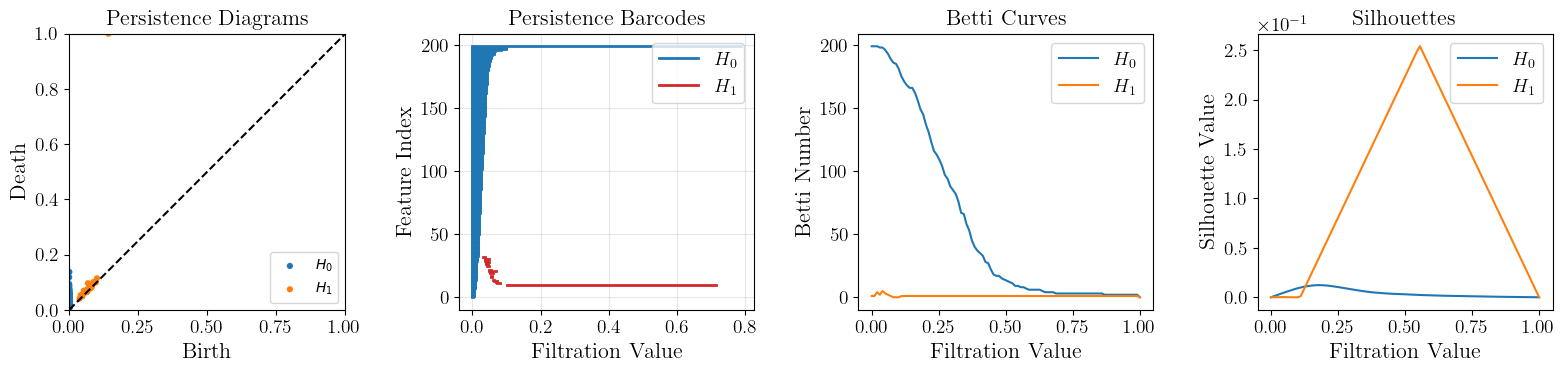

In [50]:
from gtda.diagrams import Silhouette, BettiCurve, PersistenceLandscape
from gtda.homology import VietorisRipsPersistence

from frameworks.utils.plots import plot_silhouettes, plot_betti_curves, plot_persistence_images, plot_heat_kernels, plot_landscapes, plot_persistence_diagram, plot_barcode

h_dims = 2

fig, axs = plt.subplots(1, 4, figsize=(4 * fig_size, fig_size))

vr = VietorisRipsPersistence(homology_dimensions=[i for i in range(h_dims)], n_jobs=-1)
diagrams = vr.fit_transform([samples])
scale = diagrams[0].max() - diagrams[0].min()

plot_persistence_diagram(diagrams[0], ax=axs[0])
plot_barcode(diagrams[0], axs[1])

betti = BettiCurve(n_jobs=-1)
betti_curves = betti.fit_transform(diagrams)
plot_betti_curves(betti_curves[0], axs[2], scale=scale)

silhouette = Silhouette(power=1, n_jobs=-1)
silhouettes = silhouette.fit_transform(diagrams)
plot_silhouettes(silhouettes[0], axs[3], scale=scale)

plt.tight_layout()
plt.show()
plt.close()

# todo: make an option to normalize or to match epsilon filtration
# todo: compare for different sizes and distortions of the annulus to see that persistence is the same
# offset = 1  # Spacing between barcodes for different homology dimensions
# max_offset = 0.5  # Keep track of the maximum offset for y-axis limits
# for i, dgm in enumerate(diagrams):
#     if dgm.size > 0:
#         for birth, death in dgm:
#             if death < np.inf:
#                 axs[1].plot([birth, death], [i * offset, i * offset], c='blue', linewidth=25)
#         max_offset = max(max_offset, i * offset)
# axs[1].set_title("Persistence Barcodes")
# axs[1].set_xlabel("Filtration Value")
# axs[1].set_ylabel("Homology Dimension")
# axs[1].set_yticks([i * offset for i in range(len(diagrams))])
# axs[1].set_yticklabels([f"H{i}" for i in range(len(diagrams))])
# axs[1].set_ylim(-offset, max_offset + offset)

When the filtration scale is small, every point is disconnected, which makes a feature in the 0th homology class corresponding with the number of connected components (Betti 0) equaling the number of points.
When the last point gets connected to the rest of the points, this becomes the only feature in the 0th homology class, and it never dies.
The hole in the annulus is the only long-lived feature in the 1st homology class, it appears when the annulus is formed and disappears when the filtration scale is larger than the hole's diameter.

The persistence landscape is a vector of functions that represent the persistence diagram.
It is important as it provides vectorization of persistence diagrams, which allows for the use of machine learning algorithms.

Say about convergence of persistence landscapes. (small changes in the diagram result in small changes in the landscape) and that it's a continuous.

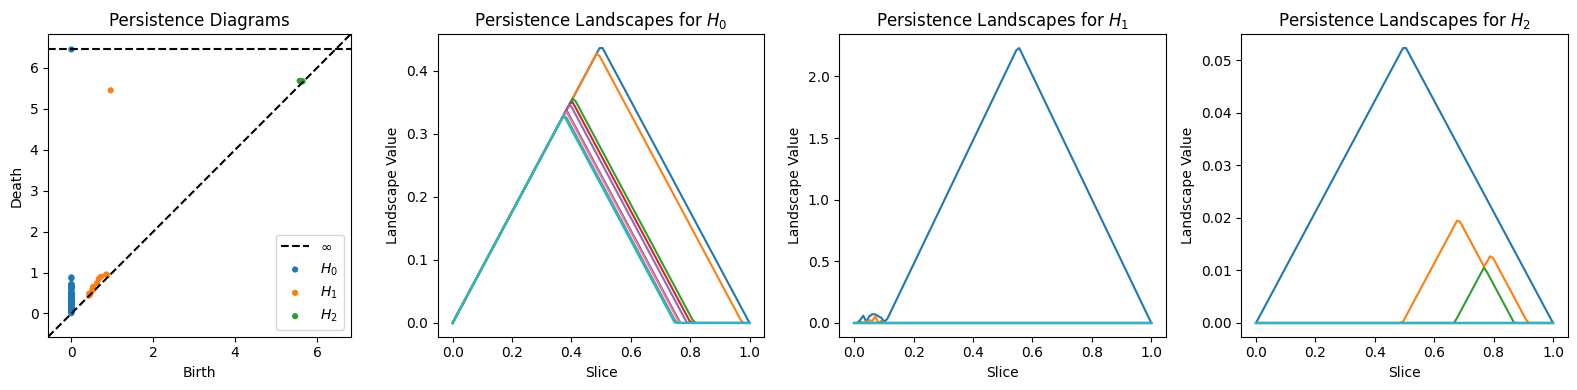

In [15]:
import matplotlib.pyplot as plt

vr = VietorisRipsPersistence(homology_dimensions=[i for i in range(h_dims)], n_jobs=-1)
diagrams = vr.fit_transform([samples])

fig, axs = plt.subplots(1, h_dims + 1, figsize=(fig_size * (1 + h_dims), fig_size))
landscape = PersistenceLandscape(n_layers=10, n_jobs=-1)
landscape_values = landscape.fit_transform(diagrams)

plot_persistence_diagram(diagrams[0], ax=axs[0])
plot_landscapes(landscape_values[0], axs[1:], 10)

plt.tight_layout()
plt.show()
# todo: make realistic range in landscape plot, not zoomed in

Compute heat kernels and persistence images

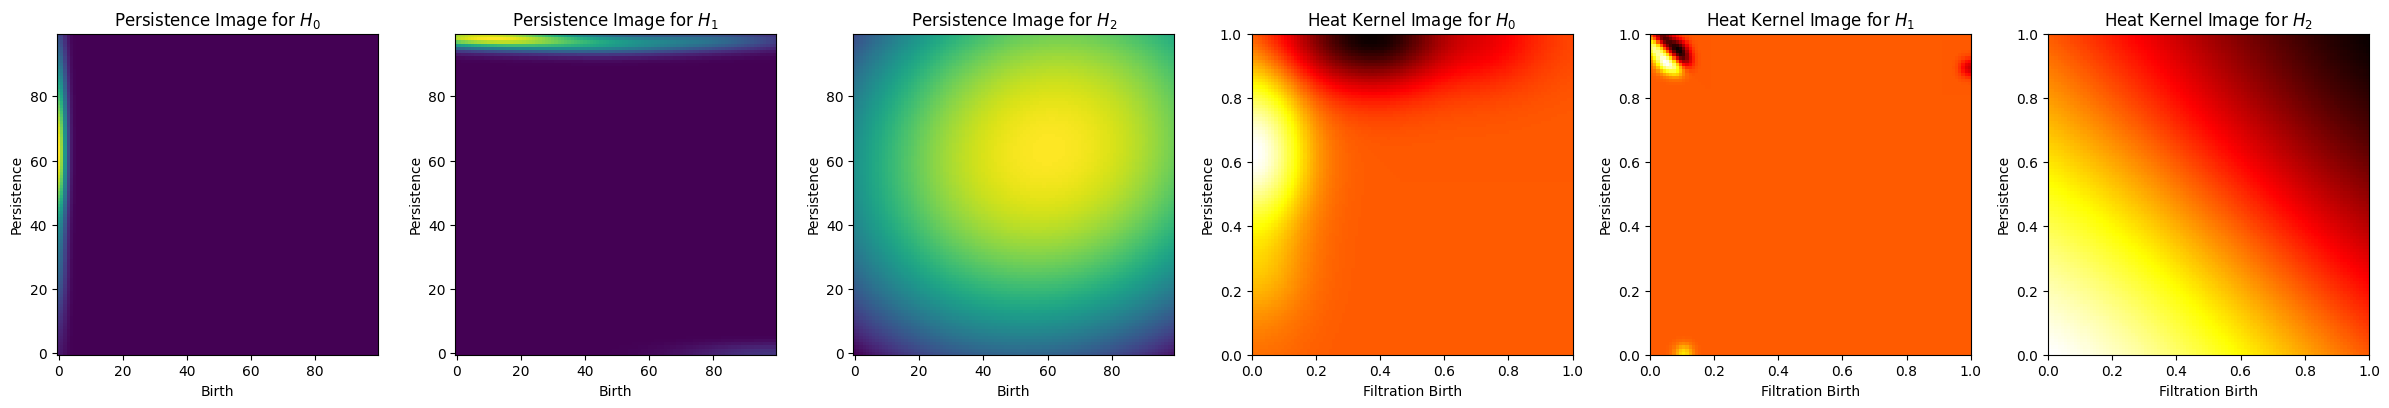

In [16]:
from gtda.diagrams import PersistenceImage, HeatKernel

fig, axs = plt.subplots(1, 2 * h_dims, figsize=(2 * fig_size * h_dims, fig_size))
pi = PersistenceImage(sigma=0.1, n_jobs=-1)
persistence_images = pi.fit_transform(diagrams)
plot_persistence_images(persistence_images[0], axs)

heat_kernel = HeatKernel(sigma=0.1, n_jobs=-1)
heat_images = heat_kernel.fit_transform(diagrams)
plot_heat_kernels(heat_images[0], axs[h_dims:])
plt.tight_layout()
plt.show()

Say about the entropy and other norms, what they represent in terms of homology of a given point-cloud

Compute persistence entropy and landscape norms.

In [17]:
import pandas as pd

from gtda.diagrams import PersistenceEntropy, Amplitude, NumberOfPoints

persistence_entropy = PersistenceEntropy(normalize=True, nan_fill_value=None, n_jobs=-1)
entropy_values = persistence_entropy.fit_transform(diagrams)

number_of_points = NumberOfPoints(n_jobs=-1)
num_points_values = number_of_points.fit_transform(diagrams)

metrics_list = {
    "bottleneck": {},  # No parameters required
    "wasserstein": {"p": 1},  # L1 norm
    # "betti": {"p": 1, "n_bins": 100},  # Includes binning for Betti curves
    "landscape": {"p": 1, "n_bins": 100},  # L1 norm and binning for persistence landscapes
    # "silhouette": {"p": 1, "power": 1.0, "n_bins": 100},  # L1 norm, power-weighted silhouette
    # "heat": {"p": 1, "sigma": 0.1, "n_bins": 100},  # Heat kernel smoothing with sigma
    # "persistence_image": {"p": 1, "sigma": 0.1, "n_bins": 100},  # Persistence image with Gaussian smoothing
}

amplitude_results = {}
for metric, metric_params in metrics_list.items():
    amplitude = Amplitude(metric=metric, metric_params=metric_params, n_jobs=-1)
    amplitude_values = amplitude.fit_transform(diagrams)
    amplitude_results[metric.capitalize() + " Norm"] = amplitude_values[0]

# Combine results into a DataFrame
metrics = pd.DataFrame(
    {
        "Homology": [f"H_{dim}" for dim in range(entropy_values.shape[1])],
        "Number of Points": num_points_values[0],
        "Persistence Entropy": entropy_values[0],
        **{metric: amplitude_results[metric] for metric in amplitude_results},
    }
)

# Display the transposed DataFrame
print(metrics.T)

                             0         1         2
Homology                   H_0       H_1       H_2
Number of Points            99        13         3
Persistence Entropy   1.243305  0.501129 -0.524487
Bottleneck Norm       0.440657  2.245942  0.052853
Wasserstein Norm     18.033661  2.722003  0.085841
Landscape Norm        0.194159  5.064099  0.002793


## Averaging Over Clouds *

`persim` library provides a way to compute the average landscape over multiple persistence diagrams.

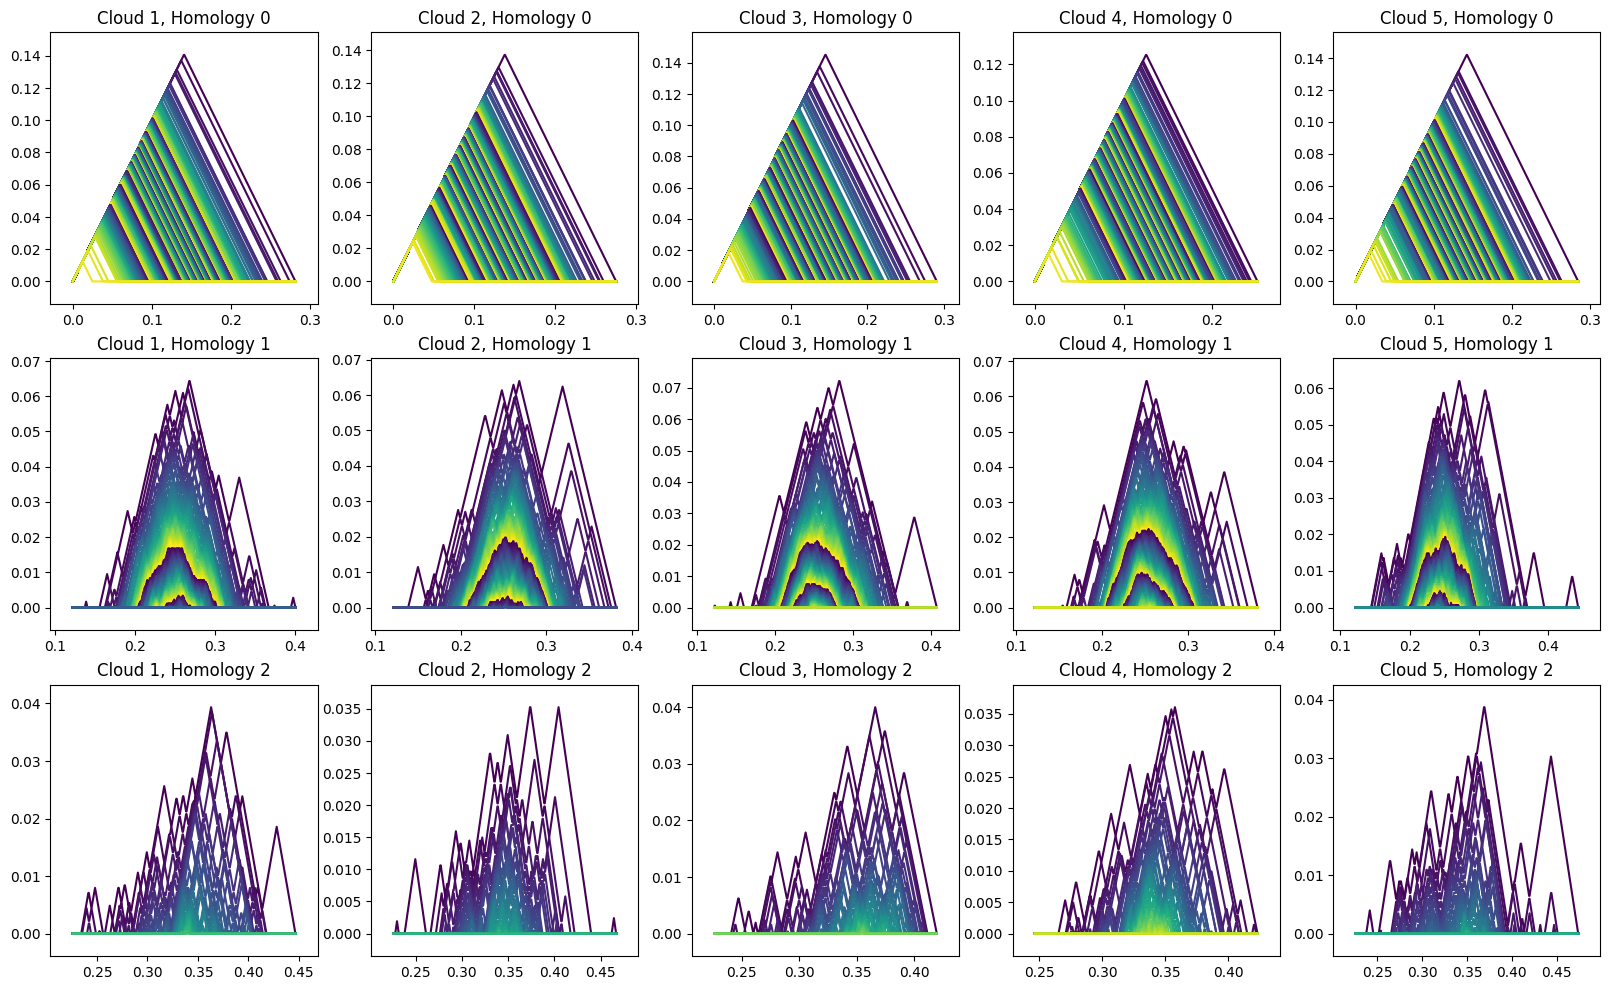

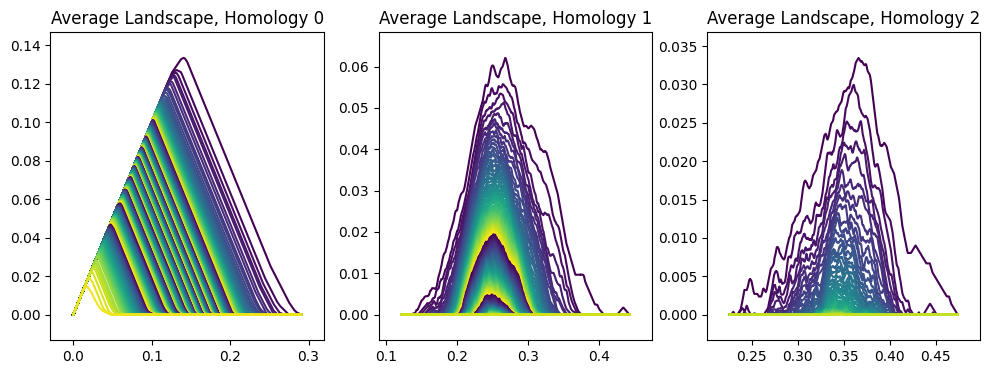

Point cloud dims: (5, 500, 4)
Persistence diagrams dims: (5, 981, 3)

Supremum Norms for Individual Clouds and Homology Dimensions:
    Cloud  Homology  Supremum Norm
0       1         0       0.140559
1       1         1       0.064332
2       1         2       0.039352
3       2         0       0.137215
4       2         1       0.063967
5       2         2       0.035239
6       3         0       0.145051
7       3         1       0.072119
8       3         2       0.039973
9       4         0       0.125256
10      4         1       0.064361
11      4         2       0.036060
12      5         0       0.142023
13      5         1       0.061910
14      5         2       0.038745

Supremum Norms for Average Landscapes by Homology Dimension:
   Homology  Supremum Norm
0         0       0.133311
1         1       0.062074
2         2       0.033461


In [18]:
from persim import PersLandscapeApprox
from gtda.homology import VietorisRipsPersistence
from persim.landscapes import average_approx
import numpy as np
import matplotlib.pyplot as plt
from persim.landscapes import plot_landscape, plot_landscape_simple
import pandas as pd

np.random.seed(42)
custom_colors = plt.cm.viridis(np.linspace(0, 1, 50))  # 10 colors from 'viridis'

# Set this color scheme globally for all plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

num_clouds = 5
num_points = 500
point_dim = 4
homology_dimensions = [0, 1, 2]

## slices or depth parameter

point_clouds = np.random.rand(num_clouds, num_points, point_dim)
num_hom_dims = len(homology_dimensions)

VR = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
dgms_multiple = VR.fit_transform(point_clouds)

def plot_homology_class(values, homology_class, start, stop, num_steps, title=None):
    """
    Plots a given homology class (landscape depth) from the computed landscape values.

    Parameters
    ----------
    values : numpy.ndarray
        The computed landscape values (K x num_steps array).
    homology_class : int
        The homology class (depth) to plot (0-indexed).
    start : float
        The start of the domain of the landscape.
    stop : float
        The end of the domain of the landscape.
    num_steps : int
        The number of steps in the domain grid.
    title : str, optional
        Title for the plot.
    """
    if homology_class >= values.shape[0]:
        raise ValueError(f"Invalid homology_class: {homology_class}. Maximum depth is {values.shape[0] - 1}.")

    # Generate the domain
    domain = np.linspace(start, stop, num_steps)

    # Get the values for the specified homology class
    landscape = values[homology_class]

    # Plot the landscape
    plt.figure(figsize=(8, 5))
    plt.plot(domain, landscape, label=rf"Homology Class $\lambda_{{{homology_class}}}$", linewidth=2)
    plt.xlabel("Domain")
    plt.ylabel("Landscape Value")
    if title:
        plt.title(title)
    else:
        plt.title(rf"Homology Class $\lambda_{{{homology_class}}}$")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

# Create subplots for each cloud, with rows corresponding to clouds and columns to homology dimensions
fig, axs = plt.subplots(num_hom_dims, num_clouds, figsize=(4 * num_clouds, 4 * num_hom_dims), squeeze=False)

sup_norms = []
average_sup_norms = []
ples = np.zeros((num_hom_dims, num_clouds), dtype=object)
# Iterate over clouds
for i, dgm in enumerate(dgms_multiple):
    dgm = [dgm[dgm[:, 2] == homology_class, :2] for homology_class in homology_dimensions]
    for homology_class in homology_dimensions:
        ple = PersLandscapeApprox(dgms=dgm, hom_deg=int(homology_class))
        ples[homology_class, i] = ple
        plot_landscape_simple(ple, ax=axs[homology_class, i], title=f"Cloud {i + 1}, Homology {homology_class}")
        axs[homology_class, i].get_legend().remove()
        # print(f"Supremum norm for Cloud {i + 1}, Homology {homology_class}: {ple.sup_norm()}")
        sup_norms.append({"Cloud": i + 1, "Homology": homology_class, "Supremum Norm": ple.sup_norm()})


plt.show()

fig, axs = plt.subplots(1, num_hom_dims, figsize=(4 * num_hom_dims, 4), squeeze=False)
# set colormap of the plot
for homology_class in homology_dimensions:
    avg_pl = average_approx(ples[homology_class])
    plot_landscape_simple(avg_pl, ax=axs[0, homology_class], title=f"Average Landscape, Homology {homology_class}")
    axs[0, homology_class].get_legend().remove()

    average_sup_norms.append({"Homology": homology_class, "Supremum Norm": avg_pl.sup_norm()})
    # print(f"Supremum norm for Average Landscape, Homology {homology_class}: {avg_pl.sup_norm()}")

plt.show()

# Display supremum norms in tables
sup_norms_df = pd.DataFrame(sup_norms)
average_sup_norms_df = pd.DataFrame(average_sup_norms)

print("Point cloud dims:", point_clouds.shape)
print("Persistence diagrams dims:", dgms_multiple.shape)

print("\nSupremum Norms for Individual Clouds and Homology Dimensions:")
print(sup_norms_df)

print("\nSupremum Norms for Average Landscapes by Homology Dimension:")
print(average_sup_norms_df)

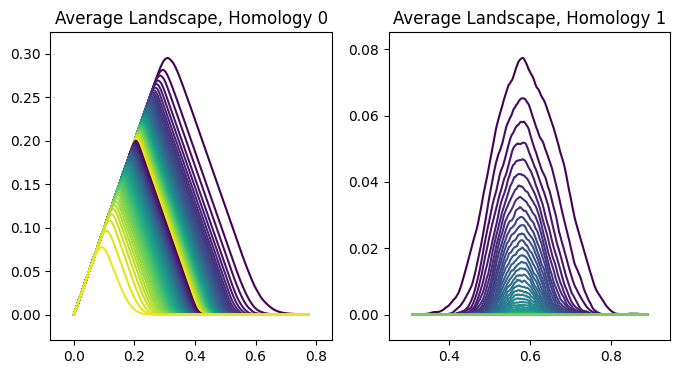

Point cloud dims: (100, 100, 6)
Persistence diagrams dims: (100, 183, 3)

Supremum Norms for Average Landscapes by Homology Dimension:
   Homology  Supremum Norm   L1 Norm
0         0       0.295239  4.291598
1         1       0.077369  0.093422
[[0.         0.01758044 0.0369439  ... 0.02313807 0.02090513 0.03646488]
 [0.01758044 0.         0.04829282 ... 0.01291607 0.03009376 0.04773429]
 [0.0369439  0.04829282 0.         ... 0.05665894 0.02944585 0.01532369]
 ...
 [0.02313807 0.01291607 0.05665894 ... 0.         0.0370871  0.05595345]
 [0.02090513 0.03009376 0.02944585 ... 0.0370871  0.         0.02554349]
 [0.03646488 0.04773429 0.01532369 ... 0.05595345 0.02554349 0.        ]]


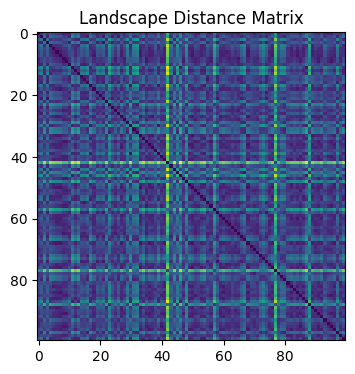

In [19]:
from persim import PersLandscapeApprox
from gtda.homology import VietorisRipsPersistence
from persim.landscapes import average_approx
import numpy as np
import matplotlib.pyplot as plt
from persim.landscapes import plot_landscape, plot_landscape_simple
import pandas as pd

np.random.seed(42)
custom_colors = plt.cm.viridis(np.linspace(0, 1, 50))  # 10 colors from 'viridis'

# Set this color scheme globally for all plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

num_clouds = 100
num_points = 100
point_dim = 6
homology_dimensions = [0, 1]

point_clouds = np.random.rand(num_clouds, num_points, point_dim)
num_hom_dims = len(homology_dimensions)

VR = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
dgms_multiple = VR.fit_transform(point_clouds)

def plot_homology_class(values, homology_class, start, stop, num_steps, title=None):
    """
    Plots a given homology class (landscape depth) from the computed landscape values.

    Parameters
    ----------
    values : numpy.ndarray
        The computed landscape values (K x num_steps array).
    homology_class : int
        The homology class (depth) to plot (0-indexed).
    start : float
        The start of the domain of the landscape.
    stop : float
        The end of the domain of the landscape.
    num_steps : int
        The number of steps in the domain grid.
    title : str, optional
        Title for the plot.
    """
    if homology_class >= values.shape[0]:
        raise ValueError(f"Invalid homology_class: {homology_class}. Maximum depth is {values.shape[0] - 1}.")

    # Generate the domain
    domain = np.linspace(start, stop, num_steps)

    # Get the values for the specified homology class
    landscape = values[homology_class]

    # Plot the landscape
    plt.figure(figsize=(8, 5))
    plt.plot(domain, landscape, label=rf"Homology Class $\lambda_{{{homology_class}}}$", linewidth=2)
    plt.xlabel("Domain")
    plt.ylabel("Landscape Value")
    if title:
        plt.title(title)
    else:
        plt.title(rf"Homology Class $\lambda_{{{homology_class}}}$")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

norms = []
average_norms = []
ples = np.zeros((num_hom_dims, num_clouds), dtype=object)

for i, dgm in enumerate(dgms_multiple):
    dgm = [dgm[dgm[:, 2] == homology_class, :2] for homology_class in homology_dimensions]
    for homology_class in homology_dimensions:
        ple = PersLandscapeApprox(dgms=dgm, hom_deg=int(homology_class))
        ples[homology_class, i] = ple
        # norms.append({"Cloud": i + 1, "Homology": homology_class, "Supremum Norm": ple.sup_norm(), "L1 Norm": ple.p_norm(p=1), "Bottleneck Norm": ple.bottleneck()})

fig, axs = plt.subplots(1, num_hom_dims, figsize=(4 * num_hom_dims, 4), squeeze=False)
for homology_class in homology_dimensions:
    avg_pl = average_approx(ples[homology_class])
    average_norms.append({"Homology": homology_class, "Supremum Norm": avg_pl.sup_norm(), "L1 Norm": avg_pl.p_norm(p=1)})

    plot_landscape_simple(avg_pl, ax=axs[0, homology_class], title=f"Average Landscape, Homology {homology_class}")
    axs[0, homology_class].get_legend().remove()

plt.show()

average_norms_df = pd.DataFrame(average_norms)

print("Point cloud dims:", point_clouds.shape)
print("Persistence diagrams dims:", dgms_multiple.shape)

print("\nSupremum Norms for Average Landscapes by Homology Dimension:")
print(average_norms_df)

from gtda.diagrams import PairwiseDistance

pairwise_distance = PairwiseDistance(metric="landscape")
landscape_distances = pairwise_distance.fit_transform(dgms_multiple)
print(landscape_distances)

plt.figure(figsize=(4, 4))
plt.imshow(landscape_distances, cmap="viridis")
plt.title("Landscape Distance Matrix")
plt.show()

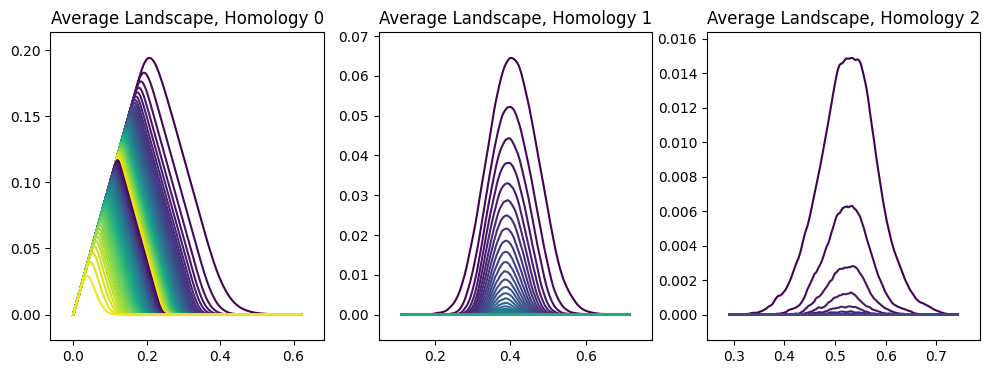

Point cloud dims: (1000, 100, 4)
Persistence diagrams dims: (1000, 187, 3)

L1 Norms for Average Landscapes by Homology Dimension:
   Homology  Supremum Norm
0         0       1.537008
1         1       0.047719
2         2       0.003242


In [20]:
from persim import PersLandscapeApprox
from gtda.homology import VietorisRipsPersistence
from persim.landscapes import average_approx
import numpy as np
import matplotlib.pyplot as plt
from persim.landscapes import plot_landscape, plot_landscape_simple
import pandas as pd

np.random.seed(42)
custom_colors = plt.cm.viridis(np.linspace(0, 1, 50))  # 10 colors from 'viridis'

# Set this color scheme globally for all plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

num_clouds = 1000
num_points = 100
point_dim = 4
homology_dimensions = [0, 1, 2]

point_clouds = np.random.rand(num_clouds, num_points, point_dim)
num_hom_dims = len(homology_dimensions)

VR = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
dgms_multiple = VR.fit_transform(point_clouds)

def plot_homology_class(values, homology_class, start, stop, num_steps, title=None):
    """
    Plots a given homology class (landscape depth) from the computed landscape values.

    Parameters
    ----------
    values : numpy.ndarray
        The computed landscape values (K x num_steps array).
    homology_class : int
        The homology class (depth) to plot (0-indexed).
    start : float
        The start of the domain of the landscape.
    stop : float
        The end of the domain of the landscape.
    num_steps : int
        The number of steps in the domain grid.
    title : str, optional
        Title for the plot.
    """
    if homology_class >= values.shape[0]:
        raise ValueError(f"Invalid homology_class: {homology_class}. Maximum depth is {values.shape[0] - 1}.")

    # Generate the domain
    domain = np.linspace(start, stop, num_steps)

    # Get the values for the specified homology class
    landscape = values[homology_class]

    # Plot the landscape
    plt.figure(figsize=(8, 5))
    plt.plot(domain, landscape, label=rf"Homology Class $\lambda_{{{homology_class}}}$", linewidth=2)
    plt.xlabel("Domain")
    plt.ylabel("Landscape Value")
    if title:
        plt.title(title)
    else:
        plt.title(rf"Homology Class $\lambda_{{{homology_class}}}$")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

sup_norms = []
average_sup_norms = []
ples = np.zeros((num_hom_dims, num_clouds), dtype=object)

for i, dgm in enumerate(dgms_multiple):
    dgm = [dgm[dgm[:, 2] == homology_class, :2] for homology_class in homology_dimensions]
    for homology_class in homology_dimensions:
        ple = PersLandscapeApprox(dgms=dgm, hom_deg=int(homology_class))
        ples[homology_class, i] = ple
        sup_norms.append({"Cloud": i + 1, "Homology": homology_class, "Supremum Norm": ple.p_norm(p=1)})


plt.show()

fig, axs = plt.subplots(1, num_hom_dims, figsize=(4 * num_hom_dims, 4), squeeze=False)
for homology_class in homology_dimensions:
    avg_pl = average_approx(ples[homology_class])
    plot_landscape_simple(avg_pl, ax=axs[0, homology_class], title=f"Average Landscape, Homology {homology_class}")
    axs[0, homology_class].get_legend().remove()
    average_sup_norms.append({"Homology": homology_class, "Supremum Norm": avg_pl.p_norm(p=1)})

plt.show()

# Display supremum norms in tables
sup_norms_df = pd.DataFrame(sup_norms)
average_sup_norms_df = pd.DataFrame(average_sup_norms)

print("Point cloud dims:", point_clouds.shape)
print("Persistence diagrams dims:", dgms_multiple.shape)

print("\nL1 Norms for Average Landscapes by Homology Dimension:")
print(average_sup_norms_df)

In [21]:
# todo: figure out parameters (n_layers, depth, and others)
# todo: add description for each plot (properties, interpretation, how to read), docs string, and signatures in func def of methods
# todo: add notes from MTH639 notebooks

# todo: fix labels
# todo: make another block with averaging (use gtda)
# todo: plot_point_cloud function
# todo: gtda pipeline
# todo: compute using VRD from H5 instead of VRgiotto
# todo: plot distance matrix between points
# todo: plot distances between landscapes depending on filtration scale